In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_csv('CarPrice_Assignment/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)
print(df.dtypes)
df.head()

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
for c in df.columns.tolist():
    if df[c].dtypes == 'object':
        print(c, df[c].unique())
        df_c = pd.get_dummies(df[c])
        #print(df_c.columns)
        df.drop([c], axis=1, inplace=True)
        df = df.join(df_c)

fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [26]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,True,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [27]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [28]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

train_size = 100

svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

In [70]:
y = df['price'].values
df1 = df.drop(['price'], axis=1)
X = df1.values.astype(float)
X.shape, y.shape

((205, 45), (205,))

In [40]:
import time

t0 = time.time()
svr.fit(X, y)
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

t0 = time.time()
kr.fit(X, y)
kr_fit = time.time() - t0
print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)

Best SVR with params: {'C': 1000.0, 'gamma': 0.01} and R2 score: -0.173
SVR complexity and bandwidth selected and model fitted in 0.764 s
Best KRR with params: {'alpha': 0.001, 'gamma': 0.01} and R2 score: -4.484
KRR complexity and bandwidth selected and model fitted in 0.623 s


In [72]:
from sklearn.preprocessing import StandardScaler
X =  StandardScaler().fit_transform(X)

In [49]:
import time

t0 = time.time()
svr.fit(X, y)
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

t0 = time.time()
kr.fit(X, y)
kr_fit = time.time() - t0
print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)

Best SVR with params: {'C': 1000.0, 'gamma': 0.01} and R2 score: 0.504
SVR complexity and bandwidth selected and model fitted in 0.646 s
Best KRR with params: {'alpha': 0.01, 'gamma': 0.01} and R2 score: 0.165
KRR complexity and bandwidth selected and model fitted in 0.496 s


In [57]:
sorted(svr.cv_results_.keys())
#svr.cv_results_['mean_test_score']

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

0.5081811512842269


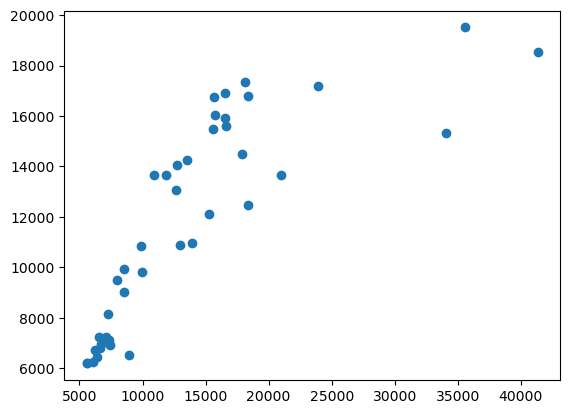

(array([20., 12.,  3.,  3.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([-2698.5597697 ,  -150.30447015,  2397.9508294 ,  4946.20612895,
         7494.4614285 , 10042.71672805, 12590.9720276 , 15139.22732715,
        17687.4826267 , 20235.73792625, 22783.9932258 ]),
 <BarContainer object of 10 artists>)

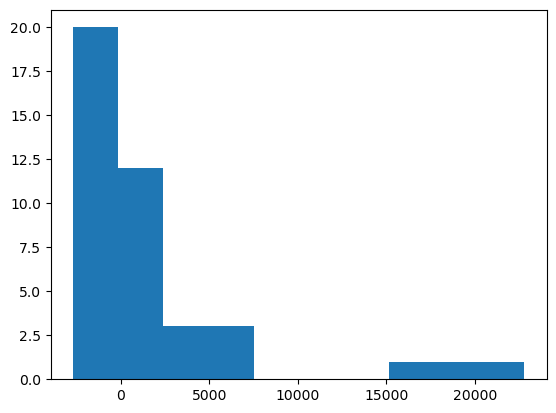

In [60]:
reg = SVR(kernel="rbf", gamma=0.01, C=1000)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred,)
plt.show()
plt.hist(y_test-y_pred)

0.8830906618710337


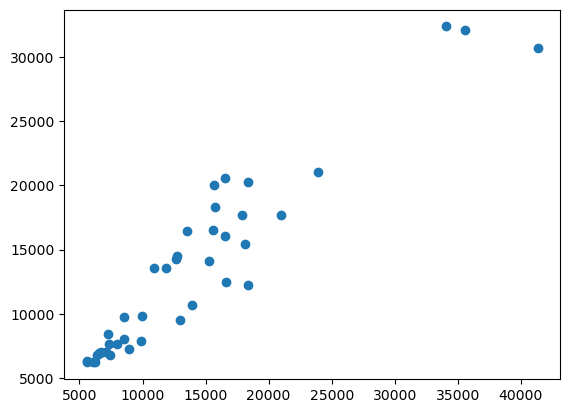

(array([ 3.,  6., 12.,  8.,  5.,  5.,  1.,  0.,  0.,  1.]),
 array([-4364.88097847, -2865.75663441, -1366.63229035,   132.49205371,
         1631.61639777,  3130.74074183,  4629.86508589,  6128.98942995,
         7628.11377401,  9127.23811807, 10626.36246213]),
 <BarContainer object of 10 artists>)

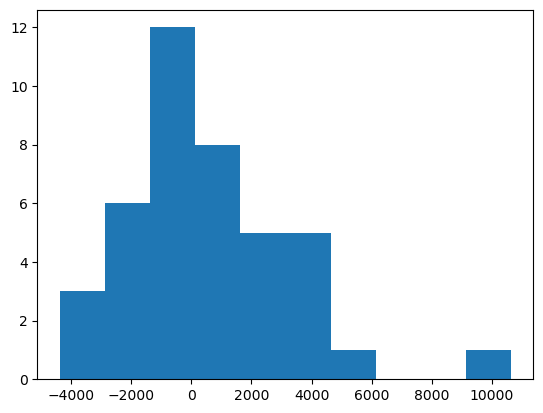

In [74]:
reg = KernelRidge(kernel="rbf", gamma=0.01, alpha=0.01)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()
plt.hist(y_test-y_pred)

In [96]:
import statsmodels.api as sm
X = df1.values
X =  StandardScaler().fit_transform(X)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary(xname=['intercept'] + df1.columns.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     57.28
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.00e-76
Time:                        01:41:03   Log-Likelihood:                -1867.4
No. Observations:                 205   AIC:                             3809.
Df Residuals:                     168   BIC:                             3932.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1.328e+04    168.763     78.671      0.000    1.29e+04    1.36e+04
symboling          327.9447    306.518      1.070      0.286    -277.178     933.068
wheelbase          507.7848    629.729      0.806      0.421    -735.417    1750.987
carlength         -696.7602    649.542     -1.073      0.285   -1979.077     585.556
carwidth          1441.2976    494.224      2.916      0.004     465.608    2416.987
carheight          652.3370    333.086      1.958      0.052      -5.237    1309.911
curbweight        1784.4469    928.772      1.921      0.056     -49.121    3618.014
enginesize        6543.3721    834.685      7.839      0.000    4895.549    8191.195
boreratio        -1211.2005    332.557     -3.642      0.000   -1867.729    -554.672
stroke           -1358.5322    282.369     -4.811      0.000   -1915.982    -801.083
compressionratio -5738.7267   1738.097     -3.302      0.001   -9170.051   -2307.402
horsepower         -17.7044    843.544     -0.021      0.983   -1683.017    1647.608
peakrpm           1184.5108    311.331      3.805      0.000     569.886    1799.135
citympg            121.3306   1029.133      0.118      0.906   -1910.369    2153.030
highwaympg        1046.7103   1000.921      1.046      0.297    -929.294    3022.714
diesel            1810.6765    570.988      3.171      0.002     683.441    2937.912
gas              -1810.6765    570.988     -3.171      0.002   -2937.912    -683.441
std               -328.5822    179.879     -1.827      0.070    -683.696      26.532
turbo              328.5822    179.879      1.827      0.070     -26.532     683.696
four                55.4727    157.066      0.353      0.724    -254.604     365.549
two                -55.4727    157.066     -0.353      0.724    -365.549     254.604
convertible        567.4753    213.517      2.658      0.009     145.954     988.997
hardtop            -42.7063    197.851     -0.216      0.829    -433.301     347.888
hatchback         -186.5587    178.928     -1.043      0.299    -539.796     166.679
sedan              229.2272    149.662      1.532      0.127     -66.233     524.687
wagon             -346.2364    200.322     -1.728      0.086    -741.710      49.237
4wd               -187.9069    212.248     -0.885      0.377    -606.924     231.110
fwd               -410.3109    174.309     -2.354      0.020    -754.429     -66.193
rwd                498.2213    193.151      2.579      0.011     116.906     879.537
front             -568.5208    155.205     -3.663      0.000    -874.925    -262.117
rear               568.5208    155.205      3.663      0.000     262.117     874.925
dohc              -256.2734    199.990     -1.281      0.202    -651.090     138.543
dohcv              207.7466    255.836      0.812      0.418    -297.320     712.813
l                 -710.

In [90]:
#reg.dual_coef_
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
pd.DataFrame({'feature': df1.columns.tolist(), 'coef': regr.coef_}).sort_values('coef')
#dir(regr)

0.5877030172358356


,feature,coef
13,highwaympg,-330.016874
12,citympg,-320.073734
26,fwd,-281.432825
38,2bbl,-212.505686
28,front,-200.780033
33,ohc,-133.951028
22,hatchback,-102.701524
24,wagon,-73.644253
16,std,-68.066310
25,4wd,-60.347522


In [64]:
from sklearn.model_selection import cross_validate
cv_results_tree_regressor = cross_validate(
    reg, X, y, cv=5, scoring="neg_mean_absolute_error", n_jobs=2
)

errors_tree_regressor = pd.Series(
    -cv_results_tree_regressor["test_score"], name="Decision tree regressor"
)
errors_tree_regressor.describe()

count       5.000000
mean     3644.935224
std      1023.905010
min      2086.764284
25%      3232.991090
50%      3911.548181
75%      4304.476726
max      4688.895841
Name: Decision tree regressor, dtype: float64

In [65]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
cv_results_tree_regressor = cross_validate(
    regressor, X, y, cv=5, scoring="neg_mean_absolute_error", n_jobs=2
)

errors_tree_regressor = pd.Series(
    -cv_results_tree_regressor["test_score"], name="Decision tree regressor"
)
errors_tree_regressor.describe()

count       5.000000
mean     3213.791873
std      1043.861675
min      2102.768293
25%      2450.528463
50%      2882.682927
75%      4308.565049
max      4324.414634
Name: Decision tree regressor, dtype: float64

0.9080996503497335


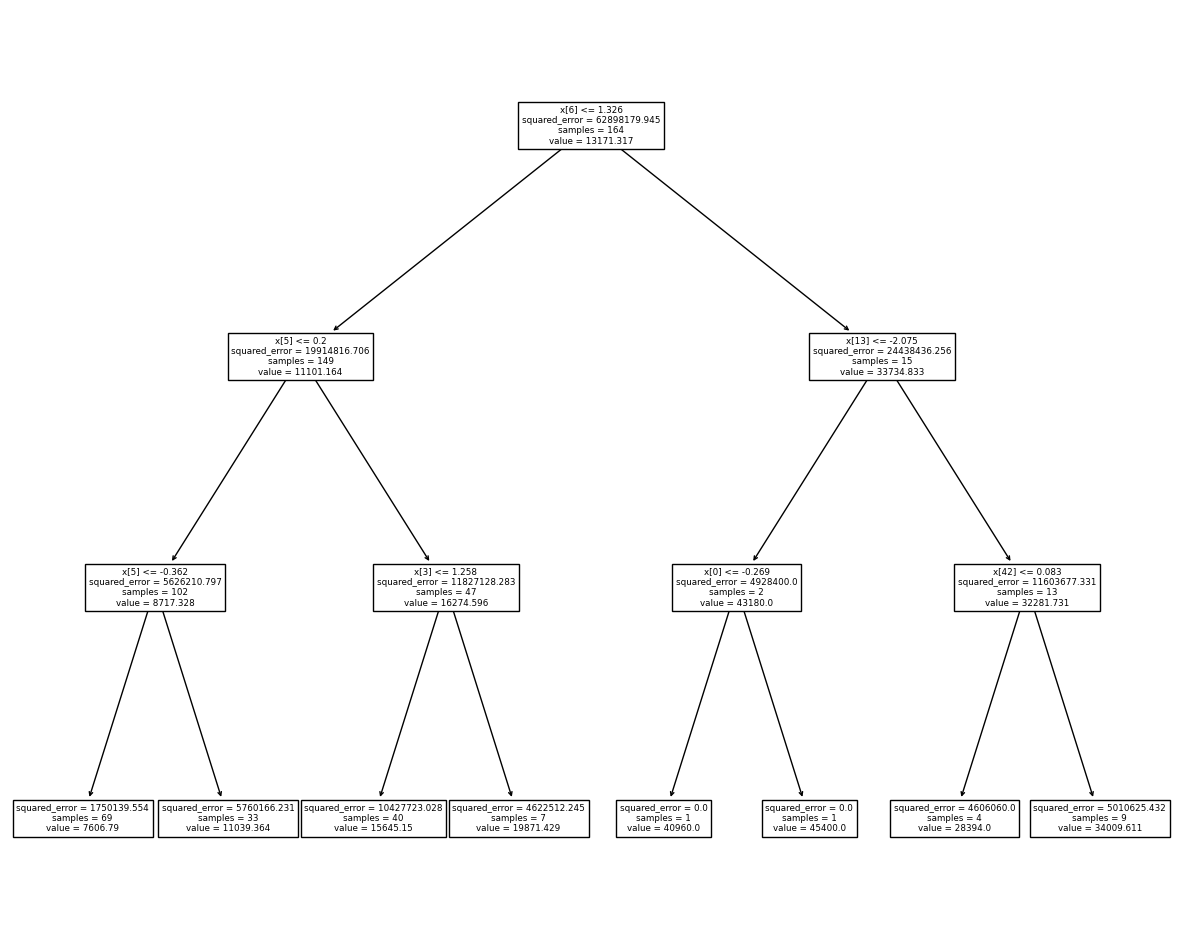

In [68]:
from sklearn import tree
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
plt.figure(figsize=(15,12))
tree.plot_tree(reg)
plt.show()

0.9126292479680156
Elapsed time to compute the importances: 0.020 seconds


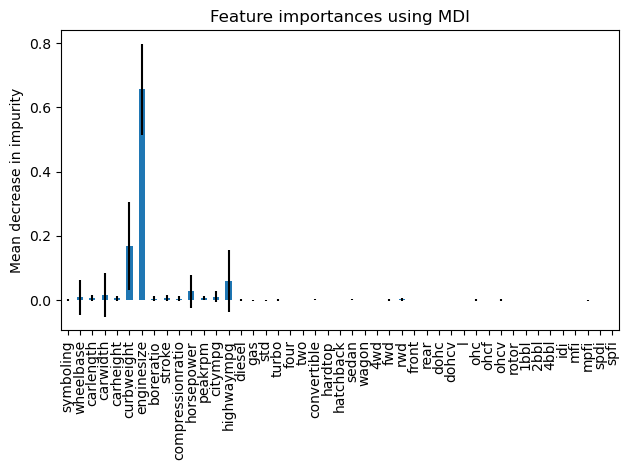

In [98]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=df1.columns.tolist())

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()